# **Unsupervised Learning**
Unsupervised learning is basically a type of algorithm that learns patterns from untagged data. 




# **Clustering**
To understand the intution behind any clustering algorithm we should first try to find answer to these questions.</BR>

**What is Clustering?</BR>**
**What should be the parameters for clustering?</BR>** 

## ***Implementation for (Hierarchical Agglomerative Clustering, HAC)***

In [1]:
#Importing the libraries
from sklearn import cluster
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

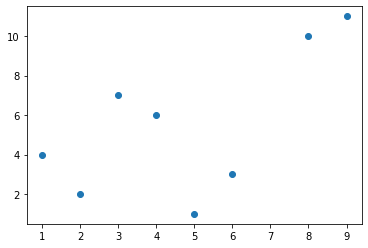

In [2]:
# The data are given as list of lists 
data1 = np.array([
    [1, 4],
    [2, 2],
    [3, 7],
    [4, 6],
    [5, 1],
    [6, 3],
    [8,10],
    [9,11]
])

# Taking transpose
x, y = data1.T
  
# plot our list in X,Y coordinates
plt.scatter(x, y)
plt.show()

In [3]:
clustering = AgglomerativeClustering(n_clusters = 4).fit(data1)
  
# print the class labels
print(clustering.labels_)

[2 2 3 3 0 0 1 1]


***Clustering the data in 4 clusters looks something like this:***

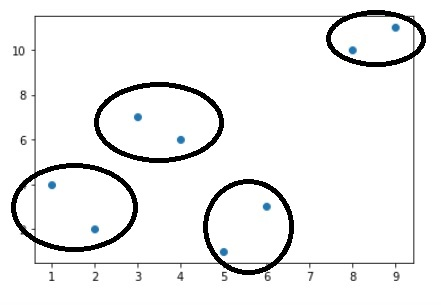

***Clustering the data in 2 clusters looks something like this:***


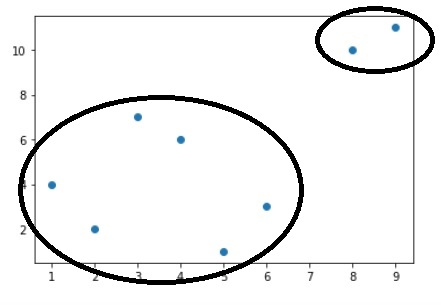

## ***How to determine the number of suitable clusters?***
We can estimate the number of clusters by using a Dendrogram.</br>

## ***What is a dendrogram?***</br> 
A dendrogram is a type of tree diagram showing hierarchical clustering — relationships between similar sets of data. It is used to analyse the hierarchical relationship between the different classes.</BR>
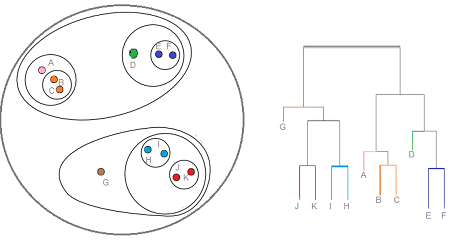

## ***Parts of a Dendrogram***
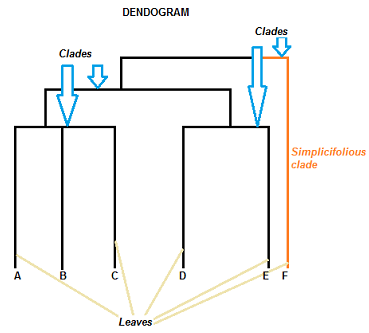

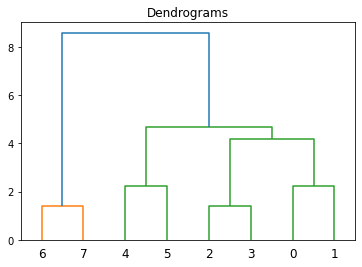

In [4]:
#Creating Dendrogram for our data
linkage_ = hierarchy.linkage(data1, method = 'average')
plt.figure() 
plt.title("Dendrograms") 
dendrogram = hierarchy.dendrogram(linkage_)

## ***Understanding the Dendrogram***
The basics of the dedrogram is like this:


1.   Clades that are close to the same height are similar to each other
2.   Clades with different heights are dissimilar
3.   The greater the difference in height, the more dissimilarity


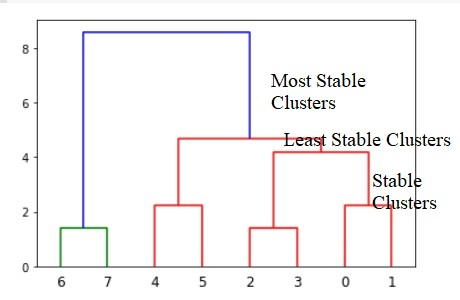

## ***Implementation on real dataset*** 

**Dataset:**</BR>
The input dataset consists data of consumers from a departmental store.
The aim of this problem is to segment the clients of a wholesale distributor based on their annual spending on diverse product categories, like milk, grocery, region, etc.</BR>
Dataset: https://drive.google.com/file/d/12etbYngOo8BHe9uHdOE9nPy5k5PLzYFY/view?usp=sharing

In [5]:
data = pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


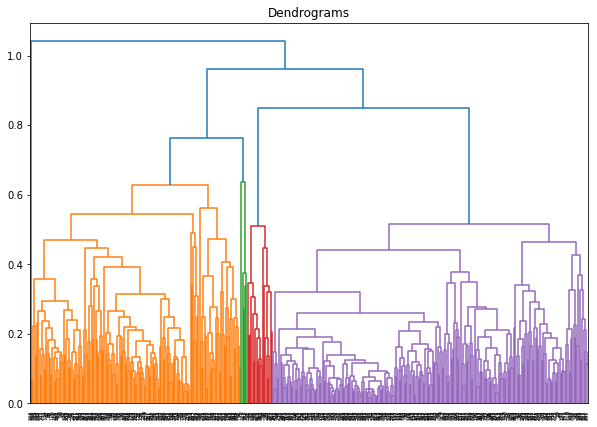

In [7]:
linkage_ = hierarchy.linkage(data_scaled, method = 'average')
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms") 
dendrogram = hierarchy.dendrogram(linkage_)

In [8]:
#Applying the clustering algorithm to the dataset
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

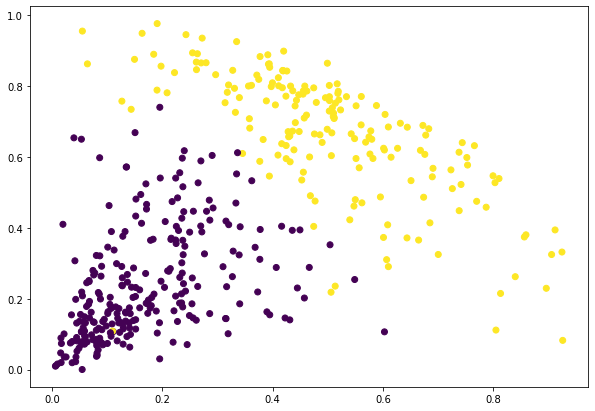

In [9]:
#Plotting the Clustering results
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_) 

# ***Advanced***

**Parameters:**</BR>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html </BR>
The Agglomerative Clustering class will require two inputs:

n_clusters: The number of clusters to form as well as the number of centroids to generate.</BR>
linkage: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. 

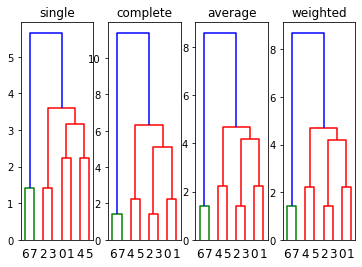

In [10]:
#Method
plt.subplot(1, 4, 1)
plt.title("single") 
dendrogram = hierarchy.dendrogram(hierarchy.linkage(data1, method = 'single'))
plt.subplot(1, 4, 2)
plt.title("complete") 
dendrogram = hierarchy.dendrogram(hierarchy.linkage(data1, method = 'complete'))
plt.subplot(1, 4, 3)
plt.title("average") 
dendrogram = hierarchy.dendrogram(hierarchy.linkage(data1, method = 'average'))
plt.subplot(1, 4, 4)
plt.title("weighted") 
dendrogram = hierarchy.dendrogram(hierarchy.linkage(data1, method = 'weighted'))

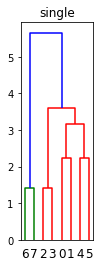

In [ ]:
#Metric
plt.subplot(1, 4, 1)
plt.title("single") 
dendrogram = hierarchy.dendrogram(hierarchy.linkage(data1, metric = 'euclidean'))

Graph Clustering:</BR>
https://github.com/Rishujamaiyar/Graph_Clustering